# Практическое занятие №6

П.Н. Советов, РТУ МИРЭА

**Задача 1**

Напишите функцию deriv для приближенного вычисления производной в заданной точке.

Пример работы:

```Python
>>> deriv(lambda x: x ** 3)(5)
75.00014999664018
```

In [2]:
def deriv(lambda_func):
    h = 0.02
    return lambda x: print((lambda_func(x+h)-lambda_func(x-h))/(2*h))

deriv(lambda x: x * x)(5)

9.999999999999787


**Задача 2**

Создайте вариант именованного кортежа с помощью ФВП. Здесь и далее старайтесь использовать конструкцию match/case.

Классы и готовые структуры данных (словари, кортежи и так далее) использовать нельзя.

Пример работы:

```Python
>>> p1 = person(name='Иван', age=20)
>>> p2 = replace(replace(p1, 'name', 'Алексей'), 'age', 21)
>>> get(p1, 'name'), get(p1, 'age')
('Иван', 20)
>>> get(p2, 'name'), get(p2, 'age')
('Алексей', 21)
```

In [1]:
def person(name, age):
    def get(obj):
        match obj:
            case 'name':
                return name
            case 'age':
                return age
    return get

def replace(p, obj, change):
    match obj:
        case 'name':
            return person(change, p('age'))
        case 'age':
            return person(p('name'), change)

def get(p, atr):
    return p(atr)

p1 = person(name='Иван', age=20)
p2 = replace(replace(p1, 'name', 'Алексей'), 'age', 21)
get(p1, 'name'), get(p1, 'age')

SyntaxError: invalid syntax (1594073862.py, line 3)

In [12]:
get(p2, 'name'), get(p2, 'age')

('Алексей', 21)

**Задача 3**

Решите задачу 4 из практики 4 («деревья выражений») без классов, с помощью функций и match/case.

In [18]:
def Num(val):
    def get(obj):
        match obj:
            case 'oper':
                return str(val)
            case 'stack':
                return f'PUSH {val}'
            case 'val':
                return val
    return get


def Add(*items):
    def get(obj):
        match obj:
            case 'oper':
                return f"({' + '.join([i('oper') for i in items])})"
            case 'val':
                value = 0
                for i in items: value += i('val')
                return value
            case 'stack':
                return "{}\nADD".format('\n'.join([i('stack') for i in items]))
    return get


def Div(*items):
    def get(obj):
        match obj:
            case 'oper':
                return f"({' / '.join([i('oper') for i in items])})"
            case 'val':
                value = items[0]('val')
                for i in items[1:]: value /= i('val')
                return value
            case 'stack':
                return "{}\nDIV".format('\n'.join([i('stack') for i in items]))
    return get


def Mul(*items):
    def get(obj):
        match obj:
            case 'oper':
                return f"({' * '.join([i('oper') for i in items])})"
            case 'val':
                value = 1
                for i in items: value *= i('val')
                return value
            case 'stack':
                return "{}\nMUL".format('\n'.join([i('stack') for i in items]))
    return get


def Sub(*items):
    def get(obj):
        match obj:
            case 'oper':
                return f"({' - '.join([i('oper') for i in items])})"
            case 'val':
                value = items[0]('val')
                for i in items[1:]: value -= i('val')
                return value
            case 'stack':
                return "{}\nSUB".format('\n'.join([i('stack') for i in items]))
    return get


def PrintVisitor():
    def visit(obj):
        return obj('oper')
    return visit


def CalcVisitor():
    def visit(obj):
        return obj('val')
    return visit


def StackVisitor():
    def visit(obj):
        return obj('stack')
    return visit


ast = Add(Num(7), Div(Mul(Num(3), Num(2)), Num(10)))
pv = PrintVisitor()
cv = CalcVisitor()
sv = StackVisitor()
print(pv(ast))
print(cv(ast))
print(sv(ast))

(7 + ((3 * 2) / 10))
7.6
PUSH 7
PUSH 3
PUSH 2
MUL
PUSH 10
DIV
ADD


**Задача 4**

Создайте тип данных односвязный список с помощью ФВП.

При создании списка нельзя использовать классы, готовые списки, кортежи и прочее.

Добавьте ряд операций в функциональном стиле:

1. Создайте функцию pair(head, tail), которая порождает элемент списка.
1. Создайте функции first(lst) (возвращает значение головы списка) и rest(lst) (возвращает хвост списка).
1. Создайте функцию make_list(`*args`), которая создает список на основе аргументов.
1. Создайте функцию list_to_string(lst), возвращающую строку, содержащую элементы списка.
1. Создайте функцию list_range(low, high), возвращающую список чисел от low до high включительно.
1. Создайте функцию foldl(func, lst, acc), вычисляющую свертку элементов списка, аналогично reduce.
1. Создайте функцию list_sum(lst) для вычисления суммы элементов списка с помощью foldl.
1. Создайте функцию fact(n) для вычисления факториала с помощью foldl и list_range.
1. Создайте функцию list_to_py(lst) для преобразования списка в обычный список Питона с помощью foldl.
1. Создайте функцию list_reverse(lst) для разворота списка в обратном направлении с помощью foldl.
1. Создайте функцию foldr(func, lst, acc), вычисляющую свертку справа для элементов списка.
1. Создайте функцию list_map(func, lst), аналог map, с помощью foldr.
1. Создайте функцию list_filter(pred, lst), аналог filter, с помощью foldr.
1. Создайте функцию sum_odd_squares для вычисления суммы квадратов нечетных чисел списка с помощью list_sum, list_map и list_filter.
1. Создайте функцию list_concat(lst1, lst2) для соединения двух списков.
1. Создайте функцию list_replace(lst, index, value) для изменения элемента списка по индексу.

In [23]:
def pair(val, tail):
    def get(obj):
        match obj:
            case 'val':
                return val
            case 'tail':
                return tail
    return get


def first(lst):
    return lst('val')# (возвращает значение головы списка)


def rest(lst):
    while lst('tail'): lst = lst('tail')
    return lst('val') # (возвращает хвост списка).


def make_list(*args):
    lst = None
    for i in args[::-1]:
        lst = pair(i, lst)
    return lst


def list_to_string(lst):
    s = ''
    while lst('tail'):
        s += str(lst('val'))
        lst = lst('tail')
    return s # возвращающую строку, содержащую элементы списка.


def list_range(low, high):
    lst = None
    for i in range(high, low - 1, -1):
        lst = pair(i, lst)
    return lst # возвращающую список чисел от low до high включительно.


def foldl(func, lst, acc):
    res = acc
    while lst:
        res = func(res, lst)
        lst = lst('tail')# вычисляющую свертку элементов списка, аналогично reduce.
    return res


def list_sum(lst):
    def summ(a, b):
        return a + b('val')
    return foldl(summ, lst, 0)# для вычисления суммы элементов списка с помощью foldl.


def fact(n):
    def mult(a, b):
        return a * b('val')
    return foldl(mult, list_range(1, n), 1)# для вычисления факториала с помощью foldl и list_range.


def list_to_py(lst):
    def to_py(a, b):
        a.append(b('val'))
        return a
    return foldl(to_py, lst, [])# для преобразования списка в обычный список Питона с помощью foldl.


def list_reverse(lst):
    def rev(a, b):
        return pair(b('val'), a)
    return foldl(rev, lst, None)# для разворота списка в обратном направлении с помощью foldl.

def foldr(func, lst, acc):
    lst = list_reverse(lst)
    res = acc
    while lst:
        res = func(res, lst)
        lst = lst('tail')
    return res# вычисляющую свертку справа для элементов списка.


def list_map(func, lst):
    def m(a, b):
        return pair(func(b('val')), a)
    return foldr(m, lst, None)# аналог map, с помощью foldr.


def list_filter(pred, lst):
    def comp(a, b):
        return pair(b('val'), a) if pred(b('val')) else a
    return foldr(comp, lst, None)# аналог filter, с помощью foldr.


def sum_odd_squares(lst):
    return list_sum(list_map(lambda x: x**2, list_filter(lambda x: x % 2 , lst)))
# для вычисления суммы квадратов нечетных чисел списка с помощью list_sum, list_map и list_filter.


def list_replace(lst, index, value):
    res = None
    i = 0
    while lst:
        res = pair(lst('val'), res) if i != index else pair(value, res)
        lst = lst('tail')
        i += 1
    return list_reverse(res) # для изменения элемента списка по индексу.



list_to_py(list_replace(list_range(0,5), 3, 0))

[0, 1, 2, 0, 4, 5]

**Задача 5**

Реализуйте механизм undo/redo в функциональном стиле для следующей программы:

```Python
import turtle

turtle.speed('fastest')
screen = turtle.Screen()
  
def line_func(x, y):
    turtle.goto(x, y)

def undo_func():
    turtle.goto(0, 0)
    turtle.clear()
    print('undo')

def redo_func():
    turtle.goto(0, 0)
    turtle.clear()
    print('redo')
  
screen.onclick(line_func)
screen.onkey(undo_func, "u")
screen.onkey(redo_func, "r")
screen.listen()
screen.mainloop()
```

In [43]:
import turtle

turtle.speed('fastest')
screen = turtle.Screen()
undo = [(0,0)]
redo = []
  
def line_func(x, y):
    turtle.goto(x, y)
    undo.append((x,y))

def undo_func():
    if len(undo) <= 1: return
    turtle.color('white')
    turtle.goto(undo[-2])
    redo.append(undo.pop(-1))
    turtle.color('black')
    print('undo')

def redo_func():
    turtle.goto(redo[-1])
    undo.append(redo.pop(-1))
    print('redo')
  
screen.onclick(line_func)
screen.onkey(undo_func, "u")
screen.onkey(redo_func, "r")
screen.listen()
screen.mainloop()

undo
undo
undo
redo
redo
redo


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\kozlo\anaconda3\envs\py10\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\kozlo\anaconda3\envs\py10\lib\turtle.py", line 685, in eventfun
    fun()
  File "C:\Users\kozlo\AppData\Local\Temp\ipykernel_9400\141292097.py", line 21, in redo_func
    turtle.goto(redo[-1])
IndexError: list index out of range
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\kozlo\anaconda3\envs\py10\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\kozlo\anaconda3\envs\py10\lib\turtle.py", line 685, in eventfun
    fun()
  File "C:\Users\kozlo\AppData\Local\Temp\ipykernel_9400\141292097.py", line 21, in redo_func
    turtle.goto(redo[-1])
IndexError: list index out of range


undo
undo
redo
redo


**Задача 6**

Создайте декоратор make_perf для получения статистики по количеству вызовов функций.

Пример работы:

```Python
>>> PERF = {}
>>> perf = make_perf(PERF)
>>> @perf
def fact(n):
	...
	
>>> @perf
def fib(n):
	...

>>> fact(10), fib(27)
3628800 196418
>>> print(PERF)
{'fact': 10, 'fib': 635621}
```

In [1]:
PERF = {}

def make_perf():
    def count(func):
        def exec(n):
            name = func.__name__
            if (name not in PERF.keys()): PERF[name] = 1
            else: PERF[name] += 1
            return func(n)
        return exec
    return count


perf = make_perf()

@perf
def fact(n):
    if (n < 2): return 1
    else: return n*fact(n-1)


@perf
def fib(n):
    if (n == 0): return 0
    elif ((n == 1) or (n == 2)): return 1
    else: return (fib(n-1) + fib(n-2))


fact(10)
fib(27)
print(PERF)

{'fact': 10, 'fib': 392835}


**Задача 7**

Создайте декоратор memo для реализации механизма мемоизации. Для проверки используйте функции из предыдущей задачи.

Пример работы:

```Python
>>> @memo
@perf
def fib(n):
	...
    
>>> fib(27)
196418
>>> PERF
{'fact': 10, 'fib': 28}
```

In [2]:
from functools import wraps


memo = {}
PERF = {}

def make_perf():
    def count(func):
        def exec(n):
            name = func.__name__
            if (name not in PERF.keys()): PERF[name] = 1
            else: PERF[name] += 1
            return func(n)
        return exec
    return count


perf = make_perf()


def memoize(function):    
        
    @wraps(function)
    def wrapper(*args):

        if args not in memo:
            memo[args] = function(*args)

        return memo[args]

    return wrapper


@memoize
@perf
def fib(n):
    if (n < 2): return n
    return (fib(n - 1) + fib(n - 2))


@perf
def fib2(n):
    if (n < 2): return n
    return (fib2(n - 1) + fib2(n - 2))


fib(20)
fib2(20)

print(PERF)

{'fib': 21, 'fib2': 21891}


**Задача 8**

Реализуйте рекурсивное вычисление факториала в виде выражения.

Необходимо это сделать без использования функций, переменных (в том числе без имени факториала) и присваиваний.

In [9]:
from functools import reduce
from operator import mul


x = 5
print(reduce(mul, range(1, x + 1), 1))

120


**Задача 9**

Реализуйте интерпретатор лямбда-исчисления.

Проверяйте полученные результаты в других интерпретаторах: см. [здесь](https://jacksongl.github.io/files/demo/lambda/index.htm) или [здесь](https://crypto.stanford.edu/~blynn/lambda/).

1. Добейтесь работы приведенных примеров из области логики, арифметики.
1. Реализуйте факториал.
1. Реализуйте синтаксический разбор входного, более удобного для записи кода, представления.
1. Добавьте в интерпретатор поддержку целых чисел.
1. Добавьте в интерпретатор поддержку операций арифметики.

Заготовка кода:

```Python
class Var:
    def __init__(self, name):
        self.name = name

    def __repr__(self):
        return self.name


class Func:
    def __init__(self, var, body):
        self.var = var
        self.body = body

    def __repr__(self):
        return f'(λ{self.var}.{self.body})'


class App:
    def __init__(self, func, arg):
        self.func = func
        self.arg = arg

    def __repr__(self):
        return f'({self.func} {self.arg})'


def subst(expr, var, arg):
    if type(expr) is Var:
        pass # TODO
    elif type(expr) is Func:
        pass # TODO
    elif type(expr) is App:
        pass # TODO


def get_fresh_var():
    pass # TODO


def rename(expr):
    def rec(expr, env):
        if type(expr) is Var:
            pass # TODO
        elif type(expr) is Func:
            pass # TODO
        elif type(expr) is App:
            pass # TODO
    return rec(expr, {})


def execute(expr):
    if type(expr) is App:
        pass # TODO
    elif type(expr) is Func:
        pass # TODO
    else:
        pass # TODO
```

Примеры программ:

```Python
I = Func(x, x)
Z = Func(f, I)
Succ = Func(w, Func(y, Func(x, App(y, App(App(w, y), x)))))
N1 = App(Succ, Z)
N2 = App(Succ, N1)
N3 = App(Succ, N2)
Add = Func(m, Func(n, Func(s, Func(z, App(App(m, s), App(App(n, s), z))))))
Exp = Func(m, Func(n, App(n, m)))

T = Func(t, Func(f, t))
F = Func(t, Func(f, f))
If = Func(l, Func(m, Func(n, App(App(l, m), n))))

Test1 = App(App(Add, App(App(Exp, N3), N2)), N1)
print(execute(Test1))
Test2 = App(App(App(If, T), N1), Z)
print(execute(Test2))
```

```
(λt128.(λt129.(t128 (t128 (t128 (t128 (t128 (t128 (t128 (t128 (t128 (t128 t129))))))))))))
(λt170.(λt171.(t170 t171)))
```

In [8]:
class Var:
    def __init__(self, name):
        self.name = name

    def __repr__(self):
        return self.name


class Func:
    def __init__(self, var, body):
        self.var = var
        self.body = body

    def __repr__(self):
        return f'(λ{self.var}.{self.body})'


class App:
    def __init__(self, func, arg):
        self.func = func
        self.arg = arg

    def __repr__(self):
        return f'({self.func} {self.arg})'


def subst(expr, var, arg):
    if type(expr) is Var:
        pass # TODO
    elif type(expr) is Func:
        pass # TODO
    elif type(expr) is App:
        pass # TODO


def get_fresh_var():
    pass # TODO


def rename(expr):
    def rec(expr, env):
        if type(expr) is Var:
            return expr
        elif type(expr) is Func:
            f = expr.var
            expr = expr.body
            #return (Func(expr.var, )) expr.body = expr.body.replace(f, env)
        elif type(expr) is App:
            return Func(expr.func, rec())
    return rec(expr, {})


def execute(expr):
    if type(expr) is App:
        return rename(expr)
    elif type(expr) is Func:
        return expr
    else:
        pass # TODO
    
x = Var('x')
y = Var('y')
w = Var('w')
m = Var('m')
s = Var('s')
z = Var('z')
n = Var('n')
f = Var('f')
t = Var('t')
l = Var('l')

I = Func(x, x)
Z = Func(f, I)
Succ = Func(w, Func(y, Func(x, App(y, App(App(w, y), x)))))
N1 = App(Succ, Z)
N2 = App(Succ, N1)
N3 = App(Succ, N2)
Add = Func(m, Func(n, Func(s, Func(z, App(App(m, s), App(App(n, s), z))))))
Exp = Func(m, Func(n, App(n, m)))

T = Func(t, Func(f, t))
F = Func(t, Func(f, f))
If = Func(l, Func(m, Func(n, App(App(l, m), n))))

Test1 = App(App(Add, App(App(Exp, N3), N2)), N1)
print(execute(N1))
# Test2 = App(App(App(If, T), N1), Z)
# print(execute(Test2))

# I = \x -> x
# Z = \f -> I
# S = \w y x -> y (w y x)
# N1 = S Z
# N2 = S N1
# N3 = S N2
# Add = \m n s z -> (m s) ((n s) z)
# Exp = \m n -> n m
# B = (Add ((Exp N3) N2)) N1

# T = \t f -> t
# F = \t f -> f
# If = \l m n -> l m n
# A = If T N1 Z
# B

#(λt128.(λt129.(t128 (t128 (t128 (t128 (t128 (t128 (t128 (t128 (t128 (t128 t129))))))))))))
#(λt170.(λt171.(t170 t171)))

(λf.(λx.x))


**Задача 10**

Реализуйте язык запросов (подмножество операций реляционной алгебры) с помощью генераторов.

Это упражнение вдохновлено работой [A SQL to C Compiler in 500 Lines of Code](https://www.repository.cam.ac.uk/bitstream/handle/1810/293479/paper.pdf).

1. Реализуйте генератор Scan('filename.csv'), который выдает очередную строку таблицы.
1. Реализуйте функцию Print(parent), которая печатает все строки таблицы.
1. Реализуйте генератор Filter(pred, filename), выдающий строки таблицы, для которых выполняется предикат pred. Для создания предикатов реализуйте ФВП Eq(x, y), Ne(x, y), Value(x), Field(x).
1. Реализуйте генератор Project(new_schema, parent_schema, parent), который выполняет операцию проекции.
1. Реализуйте генератор Join(left, right), который выполняет операцию внутреннего соединения с помощью вложенных циклов.

Примеры запросов:

```Python
# select room, title from talks.csv where time='09:00 AM'
Project(['room', 'title'], ['room', 'title'],
        Filter(Eq(Field('time'), Value('09:00 AM')), Scan('talks.csv')))


# select * from (select time, room, title as title1 from talks.csv)
# join (select time, room, title as title2 from talks.csv)
# where title1 <> title2
Filter(Ne(Field('title1'), Field('title2')), Join(
       Project(['time', 'room', 'title1'], [
               'time', 'room', 'title'], Scan('talks.csv')),
       Project(['time', 'room', 'title2'], ['time', 'room', 'title'], Scan('talks.csv')))
```

In [2]:
import csv


def getColNames(filename):
    with open(filename, 'r', encoding="utf-8") as csv_file:
        reader = csv.reader(csv_file)
        for row in reader:
            return row

def Scan(filename):
    with open(filename, 'r', encoding="utf-8") as csv_file:
        reader = csv.reader(csv_file)
        for row in reader:
            yield row

def printAllRows(filename):
    Scan = Scan(filename)
    for row in Scan:
        print(row)

def Filter(pred, scan):
    colNames = (next(scan, None)[0].split(";"))
    yield(colNames)
    for row in scan:
        if (pred(colNames, row)):
            yield row

def Eq(x, y):
    def eq(colNames, row):
        colInd = colNames.index(x)
        return (row[0].split(";")[colInd] == y)

    return eq

def Ne(x, y):
    def eq(colNames, row):
        colInd = colNames.index(x)
        return (row[0].split(";")[colInd] != y)

    return eq

def Value(x):
    return x

def Field(x):
    return x

def Project(new_schema, parent_schema, parent):
    yield new_schema
    colNames = (next(parent, None))
    parentIndices = [colNames.index(colName) for colName in parent_schema]
    for row in parent:
        yield ([row[0].split(";")[val] for val in parentIndices])

def Join(left, right):
    colNamesLeft = (next(left, None))
    colNamesRight = (next(right, None))
    newColNames = [*colNamesLeft, *colNamesRight]
    yield newColNames

    joinedTables = zip(left, right)
    for row1, row2 in joinedTables:
        yield [*row1, *row2]


for val in Join((Project(['lang2', 'func2'], ['lang', 'functional'], Filter(Eq(Field('functional'), Value('1')), Scan("langs.csv")))),
                (Project(['strict2', 'scalar2'], ['strict', 'scalar'], Filter(Eq(Field('functional'), Value('1')), Scan("langs.csv"))))):
       print(val)


['lang2', 'func2', 'strict2', 'scalar2']
['a_plus_plus', '1', '0', '0']
['agda', '1', '0', '0']
['apl', '1', '0', '0']
['cat', '1', '0', '1']
['dylan', '1', '0', '0']
['ecmascript', '1', '0', '1']
['erlang', '1', '1', '0']
['fsharp', '1', '0', '1']
['factor', '1', '0', '1']
['falcon', '1', '0', '0']
['fp', '1', '1', '0']
['funky', '1', '0', '0']
['haskell', '1', '0', '0']
['iswim', '1', '1', '0']
['j', '1', '0', '0']
['k', '1', '0', '0']
['krc', '1', '0', '0']
['lisp', '1', '0', '0']
['logo', '1', '0', '1']
['lua', '1', '1', '1']
['lux', '1', '0', '0']
['mercury', '1', '0', '0']
['miranda', '1', '0', '0']
['ml', '1', '0', '0']
['nemerle', '1', '0', '1']
['nimrod', '1', '0', '1']
['objeck', '1', '0', '1']
['opa', '1', '0', '0']
['oz', '1', '0', '0']
['perl', '1', '0', '0']
['php', '1', '0', '0']
['pike', '1', '0', '1']
['powershell', '1', '0', '0']
['r', '1', '0', '0']
['rexx', '1', '0', '0']
['rust', '1', '0', '0']
['sasl', '1', '0', '0']
['scala', '1', '0', '1']
['snobol', '1', '0', '

**Задача 11**

In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np

Pure Python version executed in 27.09475612640381 seconds.


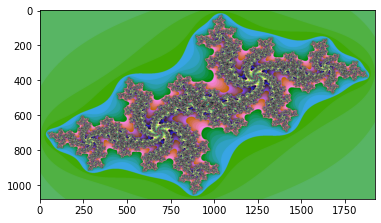

NumPy version executed in 14.443520784378052 seconds.


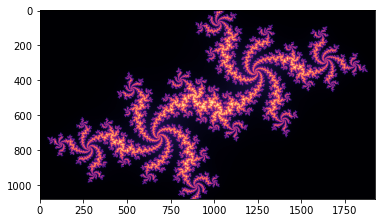

In [14]:
import time
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


def pure_python_algo():
    # параметры создаваемого изображения
    w, h, zoom = 1920, 1080, 1

    # создание нового RGB изображения
    bitmap = Image.new("RGB", (w, h), "white")

    # Выделение хранилища для изображения и загрузка пиксельных данных
    pix = bitmap.load()
        
    # переменные, соответствующие выражению для создания фрактала
    cX, cY = -0.54, 0.54
    moveX, moveY = 0.0, 0.0
    maxIter = 300

    startTime = time.time()

    for x in range(w):
        for y in range(h):
            zx = 1.5 * (x - w/2) / (0.5 * zoom * w) + moveX
            zy = 1.0 * (y - h/2) / (0.5 * zoom * h) + moveY
            i = maxIter
            while ((zx * zx + zy * zy < 4) and (i > 1)):
                tmp = zx * zx - zy * zy + cX
                zy = 2.0 * zx * zy + cY
                zx = tmp
                i -= 1

            # Байты конвертируются в RGB (то есть 3 байта) - необходимо для изменения цветов
            pix[x,y] = (i << 21) + (i << 10) + i*8

    executionTime = time.time() - startTime
    print("Pure Python version executed in {} seconds.".format(executionTime))

    plt.imshow(bitmap, cmap='magma')
    plt.show()


def julia_frac_np():
    c = (-0.54 + 0.54j)
    width, height, zoom = 1920, 1080, 1
    x, y = 0, 0
    max_iterations = 300

    # Данные значения нужны для упрощения навигации
    x_width = 1.5
    y_height = 1.5*height/width
    x_from = x - x_width/zoom
    x_to = x + x_width/zoom
    y_from = y - y_height/zoom
    y_to = y + y_height/zoom

    # Начало алгоритма
    startTime = time.time()

    x = np.linspace(x_from, x_to, width).reshape((1, width))
    y = np.linspace(y_from, y_to, height).reshape((height, 1))
    z = x + 1j * y
    c = np.full(z.shape, c)

    div_time = np.zeros(z.shape, dtype=int)
    m = np.full(c.shape, True, dtype=bool)

    for i in range(max_iterations):
        z[m] = z[m]**2 + c[m]
        m[np.abs(z) > 2] = False
        div_time[m] = i

    executionTime = time.time() - startTime
    print("NumPy version executed in {} seconds.".format(executionTime))

    return div_time


def numpy_version():
    plt.imshow(julia_frac_np(), cmap='magma')
    plt.show()


pure_python_algo()
numpy_version()


Изобразите [фрактал Жюлиа](http://paulbourke.net/fractals/juliaset/).

Реализуйте его сначала на стандартном Питоне, а затем напишите версию на NumPy (с булевой индексацией и единственным циклом). Сравните быстродействие обоих результатов.

![](images/julia.png)

**Задача 12**

Реализуйте [алгоритм Флойда-Стейнберга](https://intuit.ru/studies/courses/993/163/lecture/4511?page=3) с помощью NumPy.

Старайтесь максимально использовать возможности NumPy.

Пример работы:

![](images/dither.jpg)

![](images/dither_res.png)

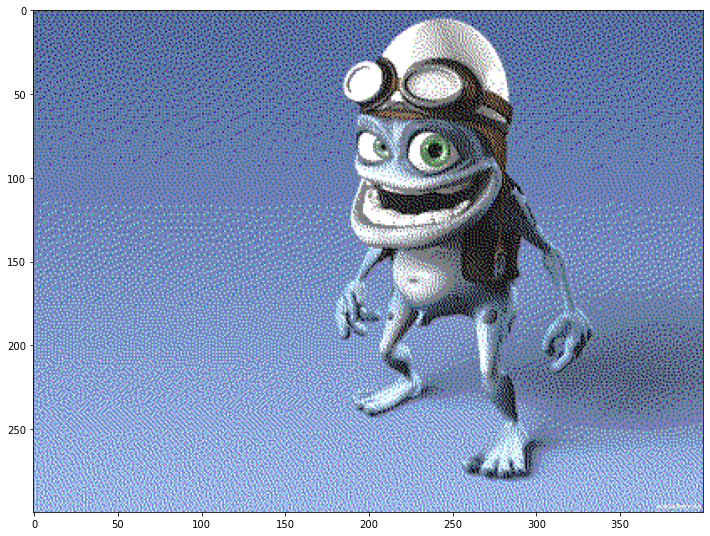

In [12]:
import numpy as np
from PIL import Image


GREYSCALE = False
img_name = "Crazy_Frog.jpg"

# Чтение изображения, преобразование в ЧБ
img = Image.open(img_name)
if GREYSCALE:
    img = img.convert('L')

width, height = img.size
new_width = 400
new_height = int(height * new_width / width)
img = img.resize((new_width, new_height), Image.ANTIALIAS)

def get_new_val(old_val, nc):
    # Получение "ближайшего" цвета в old_val в диапазоне [0,1] для каждого канала, разделенного на nc значения
    
    return np.round(old_val * (nc - 1)) / (nc - 1)


def fs_dither(img, nc):
    # Рассеяние Флойда-Стейнберга для изображения img в палитру с nc цветами для каждого канала

    arr = np.array(img, dtype=float) / 255

    for ir in range(new_height):
        for ic in range(new_width):
            # Сюда нужно скопировать NB для RGB массивов (иначе err будет равен (0,0,0))
            old_val = arr[ir, ic].copy()
            new_val = get_new_val(old_val, nc)
            arr[ir, ic] = new_val
            err = old_val - new_val
            # В этом примере игнорируются крайние пиксели
            if ic < new_width - 1:
                arr[ir, ic+1] += err * 7/16
            if ir < new_height - 1:
                if ic > 0:
                    arr[ir+1, ic-1] += err * 3/16
                arr[ir+1, ic] += err * 5/16
                if ic < new_width - 1:
                    arr[ir+1, ic+1] += err / 16

    carr = np.array(arr/np.max(arr, axis=(0,1)) * 255, dtype=np.uint8)
    return carr


nc = 3
result = fs_dither(img, nc)
fig, ax = plt.subplots()
ax.imshow(result)
fig.set_figheight(12)
fig.set_figwidth(12)
plt.show()

